In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [270]:
#we define first the value of h,the corresponding range in x and the constants
h=0.2
a=20.0 
bXR=300.0
kXR=3000.0
gXR=0.333
dXRa=10.0 #d (actived XR)
aX=20.0
bX=300.0 
bXR=20.0
nX=2.0
kx=3000.0
gCY=0.2
kXR=3000.0
gXRa=0.333
dXR=10.0

n_points = int((411.0+h)/h)
t = zeros(n_points)
XR = zeros(n_points)
CY = zeros(n_points)
A = zeros(n_points)
XRa = zeros(n_points)
#A no cambia 

In [271]:
#we define all the functions 

def func_XR_prime(t,XR,CY,XRa,A):
    return a -((bXR)/(1.0+(A/kXR)))-(gXR*XR)+(dXRa*XRa)

def func_CY_prime(t,XR,CY,XRa,A):
    return a+((bX*pow(XRa,nX))/(pow(kx,nX)+pow(XRa,nX)))-(gCY*CY)

def func_XRa_prime(t,XR,CY,XRa,A):
    return (bXR/(1.0+(A/kXR)))-(gXRa*XRa)-(dXRa*XRa)

In [278]:
t = []
XR = []
CY = []
A = []
XRa = []

for i in range(n_points):
    t.append(i)

for i in range(2056):

    XR.append(0)
    CY.append(0)
    A.append(0)
    XRa.append(0)
    
for i in range(1,n_points):
    
    A.append(4000*sin(t[i]/100)+4000)

for i in range(1,n_points):
  
    k1_XR = func_XR_prime(t[i-1],XR[i-1],CY[i-1],XRa[i-1],A[i-1])
    
    k1_CY = func_CY_prime(t[i-1],XR[i-1],CY[i-1],XRa[i-1],A[i-1])
    
    k1_XRa = func_XRa_prime(t[i-1],XR[i-1],CY[i-1],XRa[i-1],A[i-1])

    #first step
    t1 = t[i-1] + (h/2.0)
    XR1 = XR[i-1] + (h/2.0) * k1_XR
    CY1 = CY[i-1] + (h/2.0) * k1_CY
    XRa1 = XRa[i-1] + (h/2.0) * k1_XRa

    k2_XR = func_XR_prime(t1,XR1,CY1,XRa1,A[i-1])
    k2_CY = func_CY_prime(t1,XR1,CY1,XRa1,A[i-1])
    k2_XRa = func_XRa_prime(t1,XR1,CY1,XRa1,A[i-1])


    #second step
    t2 = t[i-1] + (h/2.0)
    XR2 = XR[i-1] + (h/2.0) * k2_XR
    CY2 = CY[i-1] + (h/2.0) * k2_CY
    XRa2 = XRa[i-1] + (h/2.0) * k2_XRa
     
    k3_XR = func_XR_prime(t2,XR2,CY2,XRa2,A[i-1])
    k3_CY = func_CY_prime(t2,XR2,CY2,XRa2,A[i-1])
    k3_XRa = func_XRa_prime(t2,XR2,CY2,XRa2,A[i-1])
        
    #third step
    t3 = t[i-1] + h
    XR3 = XR[i-1] + (h/2.0) * k3_XR
    CY3 = CY[i-1] + (h/2.0) * k3_CY
    XRa3 = XRa[i-1] + (h/2.0) * k3_XRa
    
    k4_XR = func_XR_prime(t3,XR3,CY3,XRa3,A[i-1])
    k4_CY = func_CY_prime(t3,XR3,CY3,XRa3,A[i-1])
    k4_XRa = func_XRa_prime(t3,XR3,CY3,XRa3,A[i-1])
    
    #fourth step
    average_k_XR = (1.0/6.0)*(k1_XR + 2.0*k2_XR + 2.0*k3_XR + k4_XR)
    average_k_CY = (1.0/6.0)*(k1_CY + 2.0*k2_CY + 2.0*k3_CY + k4_CY)
    average_k_XRa = (1.0/6.0)*(k1_XRa + 2.0*k2_XRa + 2.0*k3_XRa + k4_XRa)

    t.append(t[i-1] + h)
    XR.append(XR[i-1] + h * average_k_XR)
    CY.append(CY[i-1] + h * average_k_CY)
    XRa.append(XRa[i-1] + h * average_k_XRa)

In [279]:
len(XR),len(t),len(A)

(4111, 4111, 4111)

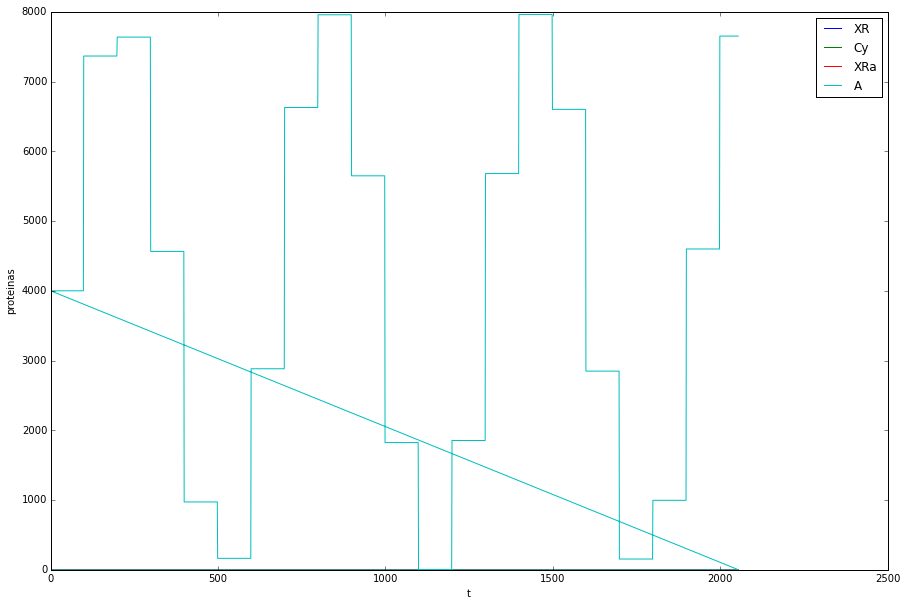

In [280]:
plot(t,XR,label='XR')
plot(t,CY,label='Cy')
plot(t,XRa,label='XRa')
plot(t,A,label='A')
plt.xlabel('t')
plt.ylabel('proteinas')
legend()
figure(figsize(15,10))